In [10]:
import imageio
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [79]:
cap = cv2.VideoCapture('imgs/vecteezy_glowing-stars-sparkle-loop-animation-video-transparent_21764485_145.mov')
frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        frames.append(frame)
    else:
        break

In [43]:
frame = frames[100]
# resize frame to 669 x 669
frame = cv2.resize(frame, (669, 669))

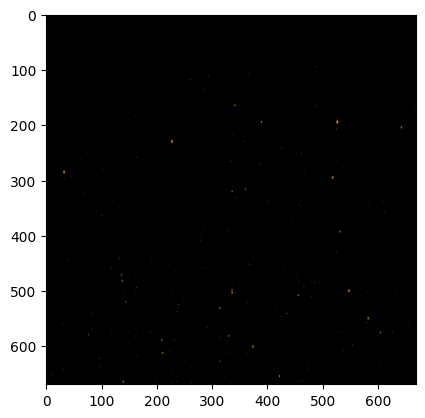

In [44]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)

In [55]:
img = cv2.imread('imgs/zizek.jpeg')
# 

In [80]:
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm


outs = []
for i in tqdm(range(len(frames))):
    frame = frames[i]
    frame = cv2.resize(frame, (669, 669))
# Convert image1 to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Threshold the grayscale image to create a mask
    _, mask = cv2.threshold(gray, 1, 254, cv2.THRESH_BINARY)

    # Invert the mask
    inverted_mask = cv2.bitwise_not(mask)

    # Apply the inverted mask to the second image
    masked_image2 = cv2.bitwise_and(img, img, mask=inverted_mask)

    # Combine the masked second image with the first image
    result = cv2.bitwise_or(frame, masked_image2)

    # Display the result
    #plt.imshow(result)
    #plt.show()
    #plt.axis('off')

    # Save the result to a file
    outs.append(cv2.cvtColor(result, cv2.COLOR_RGB2BGR))


100%|██████████| 300/300 [00:07<00:00, 41.42it/s]


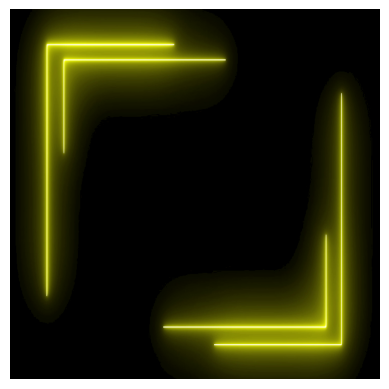

In [68]:
threshold_r = 10  # Red channel threshold
threshold_g = 10  # Green channel threshold
threshold_b = 10  # Blue channel threshold
image = frame
# Create a binary mask for black regions
mask = (image[:, :, 0] <= threshold_b) & (image[:, :, 1] <= threshold_g) & (image[:, :, 2] <= threshold_r)

# Apply the mask to create a masked image
masked_image = np.copy(image)
masked_image[mask] = [0, 0, 0]  # Set black regions to black (0, 0, 0)

# Display the result
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

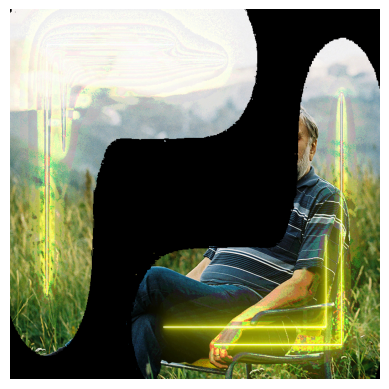

In [76]:
threshold_r = 0  # Red channel threshold
threshold_g = 0  # Green channel threshold
threshold_b = 0  # Blue channel threshold
image2 = frame
# Create a mask based on the RGB thresholds
mask = (image2[:, :, 0] <= threshold_b) & (image2[:, :, 1] <= threshold_g) & (image2[:, :, 2] <= threshold_r)
mask = mask.astype(np.uint8) * 255
image1 = img
# Invert the mask
inverted_mask = cv2.bitwise_not(mask)

# Apply the inverted mask to the background image
masked_image1 = cv2.bitwise_and(image1, image1, mask=inverted_mask)

# Combine the masked background image with the filtered image
result = cv2.bitwise_or(masked_image1, image2)

# Display the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [81]:
# turn outs into a video
imageio.mimsave('outputs/zizek_stars.mp4', outs, fps=30)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (669, 669) to (672, 672) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x7ff052c92000] Warning: data is not aligned! This can lead to a speed loss
